# Advent of Code 2021 edition -Days 6 to 10-

In [1]:
# necessary imports
from pathlib import Path
from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ROOT_DIR = Path().resolve().parents[3]
DATA_DIR = ROOT_DIR / "data" / "2021"

DATA_DIR

WindowsPath('C:/Users/User/Documents/Projects/advent-code/data/2021')

# --- Day 6: Lanternfish ---

In [4]:
def load_data_day_6() -> List[int]:
    day_six_file = DATA_DIR / "day6"
    with open(day_six_file, "r") as f:
        return [int(age) for age in f.read().split(",")]
    
lanternfishes = load_data_day_6()
lanternfishes[:5]

[4, 5, 3, 2, 3]

In [5]:
# main functions
def evolve_lanternfishes(lanternfishes: List[int]) -> List[int]:
    """Takes a list of lanternfish timers from T iteration (in days) and returns it at T+1

    Every day, each timer from the list decreases by 1 and resets to 6 after it hits 0 as
    controlled by the `% 7` operator. Before decreasing, the function checks whether the
    population increased and adds 8 to the list everytime it finds a timer value of 0.

    Parameters
    ----------
    lanternfishes : List[int]
        List of lanternfish timers at T

    Returns
    -------
    List[int]
        List of lanternfish timers at T+1
    """
    newborn_lanternfishes = sum([lanternfish == 0 for lanternfish in lanternfishes])
    return [(lanternfish - 1) % 7 if lanternfish < 7 else lanternfish - 1 for lanternfish in lanternfishes] + [
        8 for _ in range(newborn_lanternfishes)
    ]


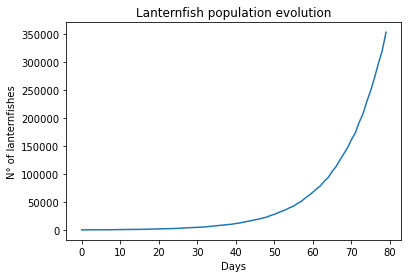

In [9]:
# illustration
t_max = 80
lfish_pop = []

evo_population = lanternfishes[:]

for _ in range(t_max):
    evo_population = evolve_lanternfishes(evo_population)
    lfish_pop.append(len(evo_population))
    
fig, ax = plt.subplots()
ax.plot(np.arange(t_max), lfish_pop)
ax.set_title("Lanternfish population evolution")
ax.set_ylabel("N° of lanternfishes")
ax.set_xlabel("Days")
plt.show()

We can see that the lanternfish population evolution obeys an exponential law that can be written like so:

$$
D = A \times \exp^{Bt}
$$